In [165]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [166]:
# Reading the data from csv file

bike = pd.read_csv('day.csv')

In [167]:
# Checking the data

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [168]:
# Checking the shape of the dataframe

bike.shape

(730, 16)

In [169]:
# Checking the summary

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### No null values are present

In [170]:
# Checking the statistical summary

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Changing the values of categorical variables from numerical to string

In [171]:
# Changing values of season, month, weekday and weathersit from numeric to string

# season

bike.season=bike.season.replace([1,2,3,4],['spring','summer','fall','winter'])


# month

bike.mnth=bike.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],['jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec'])


# weekday

bike.weekday=bike.weekday.replace([1,2,3,4,5,6,0],['mon','tue','wed','thu','fri','sat','sun'])


# weathersit

bike.weathersit=bike.weathersit.replace([1,2,3,4],['clear','cloudy','light_rain','heavy_rain'])


In [172]:
# Renaming Variables

bike.rename(columns={'mnth':'month','yr':'year','hum':'humidity'},inplace=True)

In [173]:
# dropping unnecessary  variables

# dropping dteday - we already have weekdays and month
# instant - already have the index values
# cnt is the sum of both casual and registered, so no longer needed.

bike.drop(columns=['instant','dteday','casual','registered'],axis=1,inplace=True)

In [174]:
# checking the data after dropping variables

bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [175]:
# Making list of columns 

bike.columns.tolist()

['season',
 'year',
 'month',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'cnt']

###  Visualising Numeric Variables

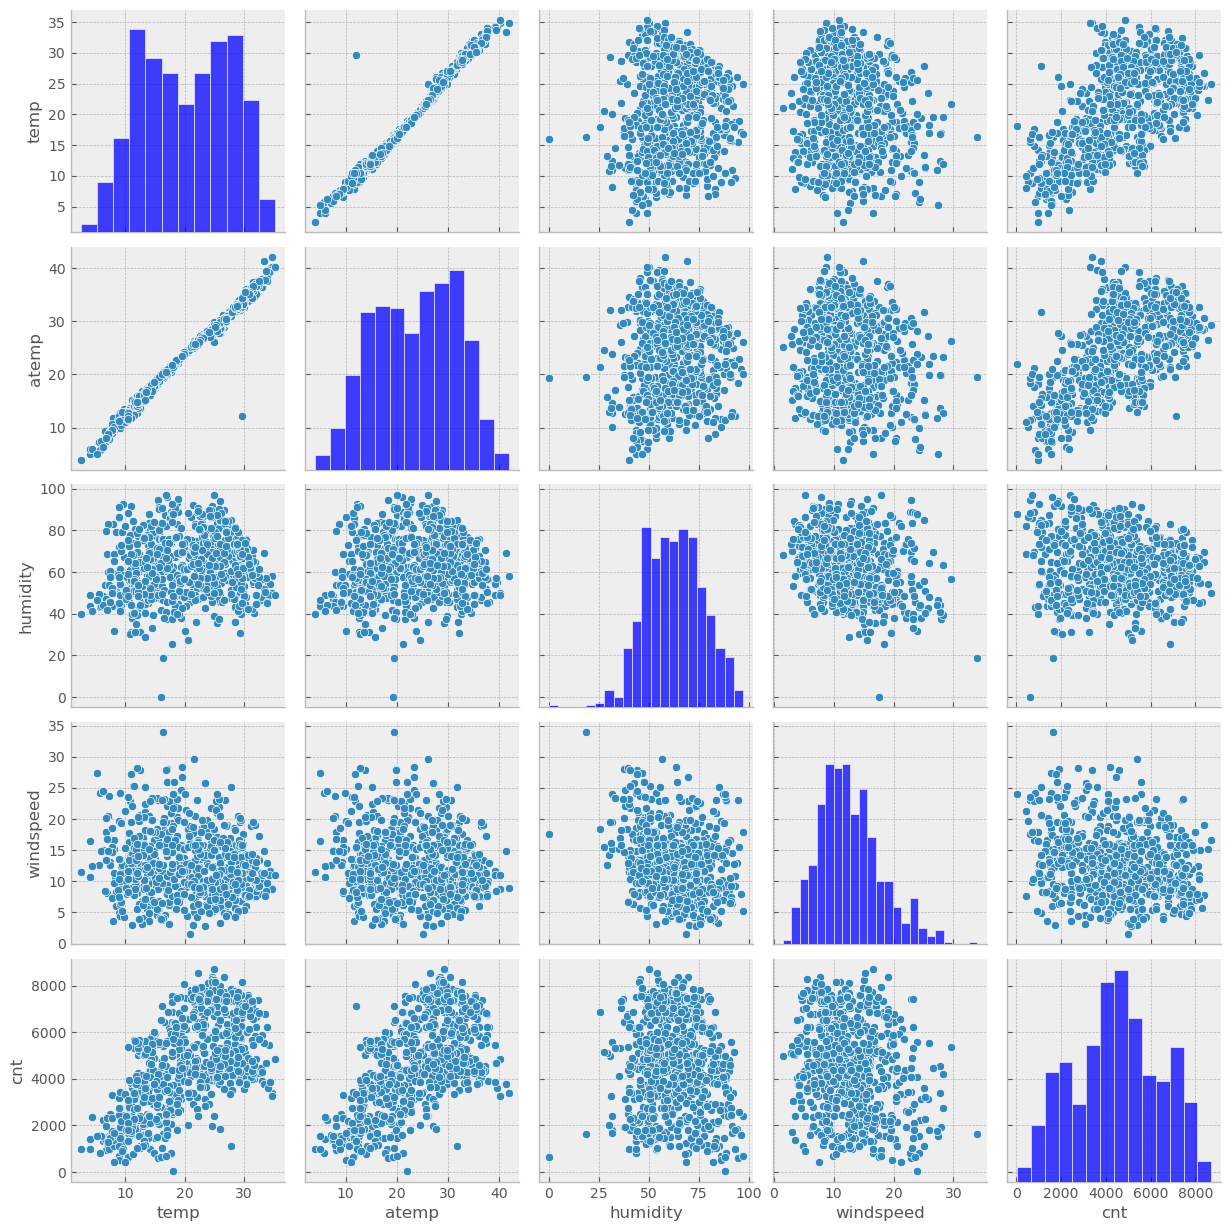

In [176]:
# Plotting pair-plot for numeric variables

V = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

plt.style.use('bmh')
sns.pairplot(bike[V])
plt.show()

### Insights:-

* Variables temp and atemp shows strong positive correlation.

### Visualising Categorical Variables

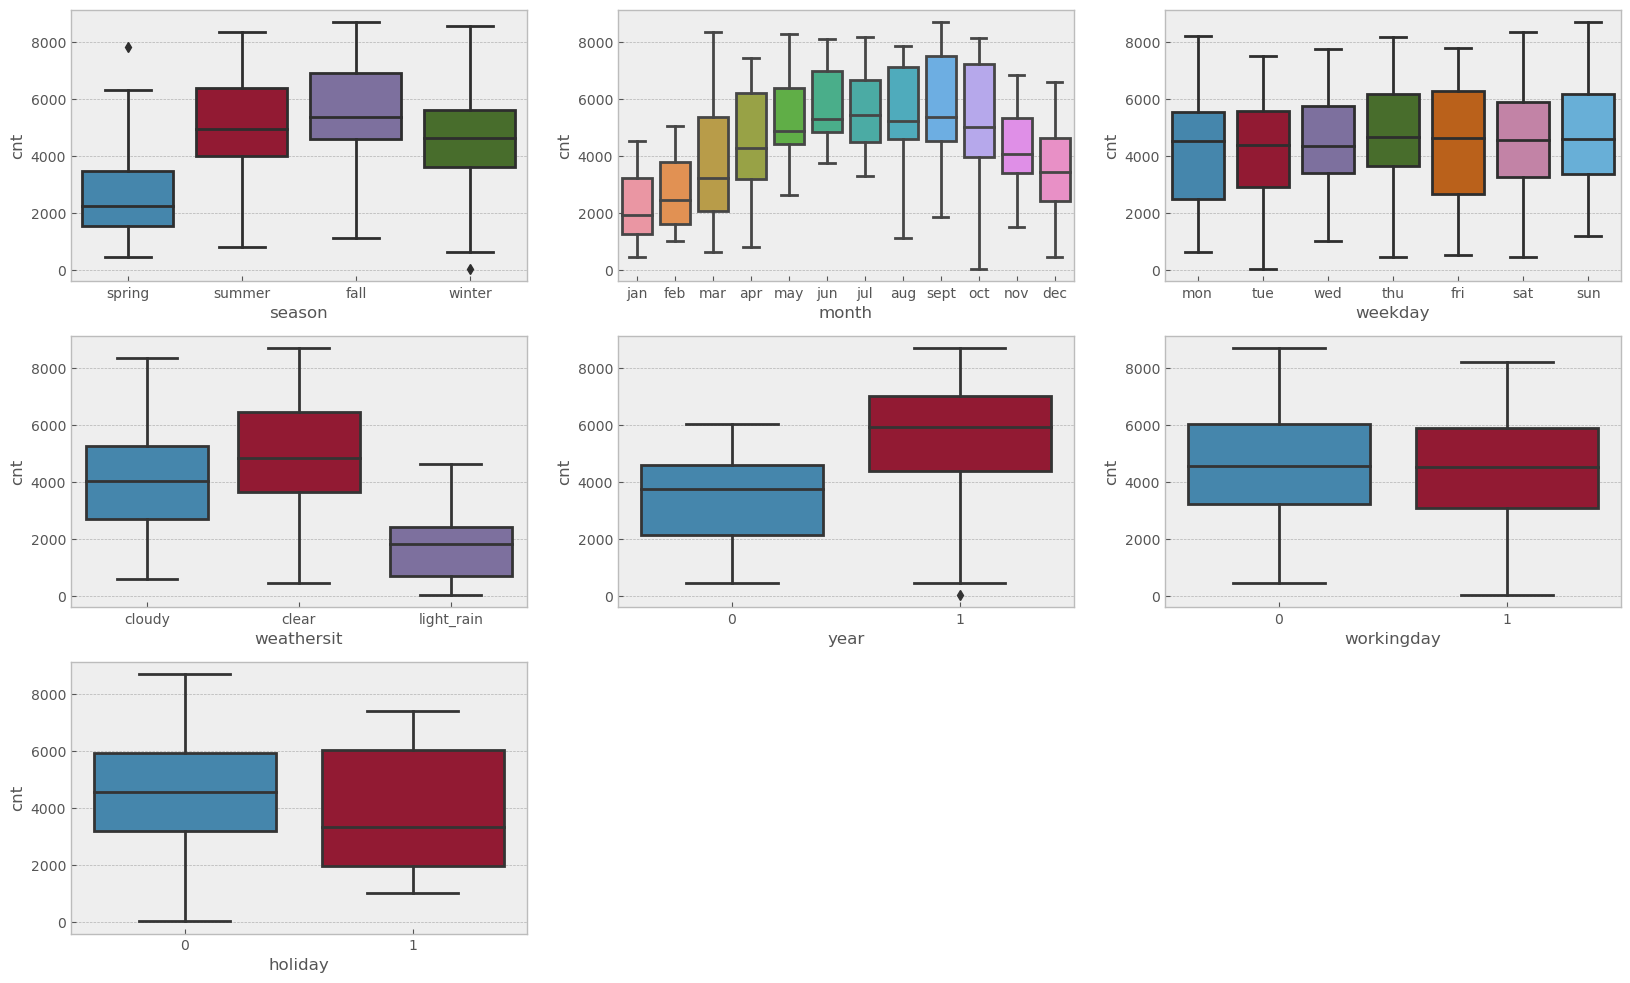

In [177]:
# Plotting box plot for categorical variables with respect to 'cnt'

plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(x = 'season',     y = 'cnt', data = bike)

plt.subplot(3,3,2)
sns.boxplot(x = 'month',      y = 'cnt', data = bike)

plt.subplot(3,3,3)
sns.boxplot(x = 'weekday',    y = 'cnt', data = bike)

plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.subplot(3,3,5)
sns.boxplot(x = 'year',       y = 'cnt', data = bike)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)

plt.subplot(3,3,7)
sns.boxplot(x = 'holiday',    y = 'cnt', data = bike)

plt.show()


### Insights:-

1. Fall season has the highest cnt i.e highest demand for bikes followed by summer season.
2. The demand for bike increases till September and September month has the highest number of rental bikes. After September the demand decreases.
3. The no. of rental bikes remains approximately  the same throughout the week with slight peak on Friday.
4. The highest demand for the rental bikes was during the clear weather followed  by cloudy weather.
5. The demand for rental bikes varies on holiday.
6. The demand for rental bikes in 2019 is much higher as compared to year 2018.


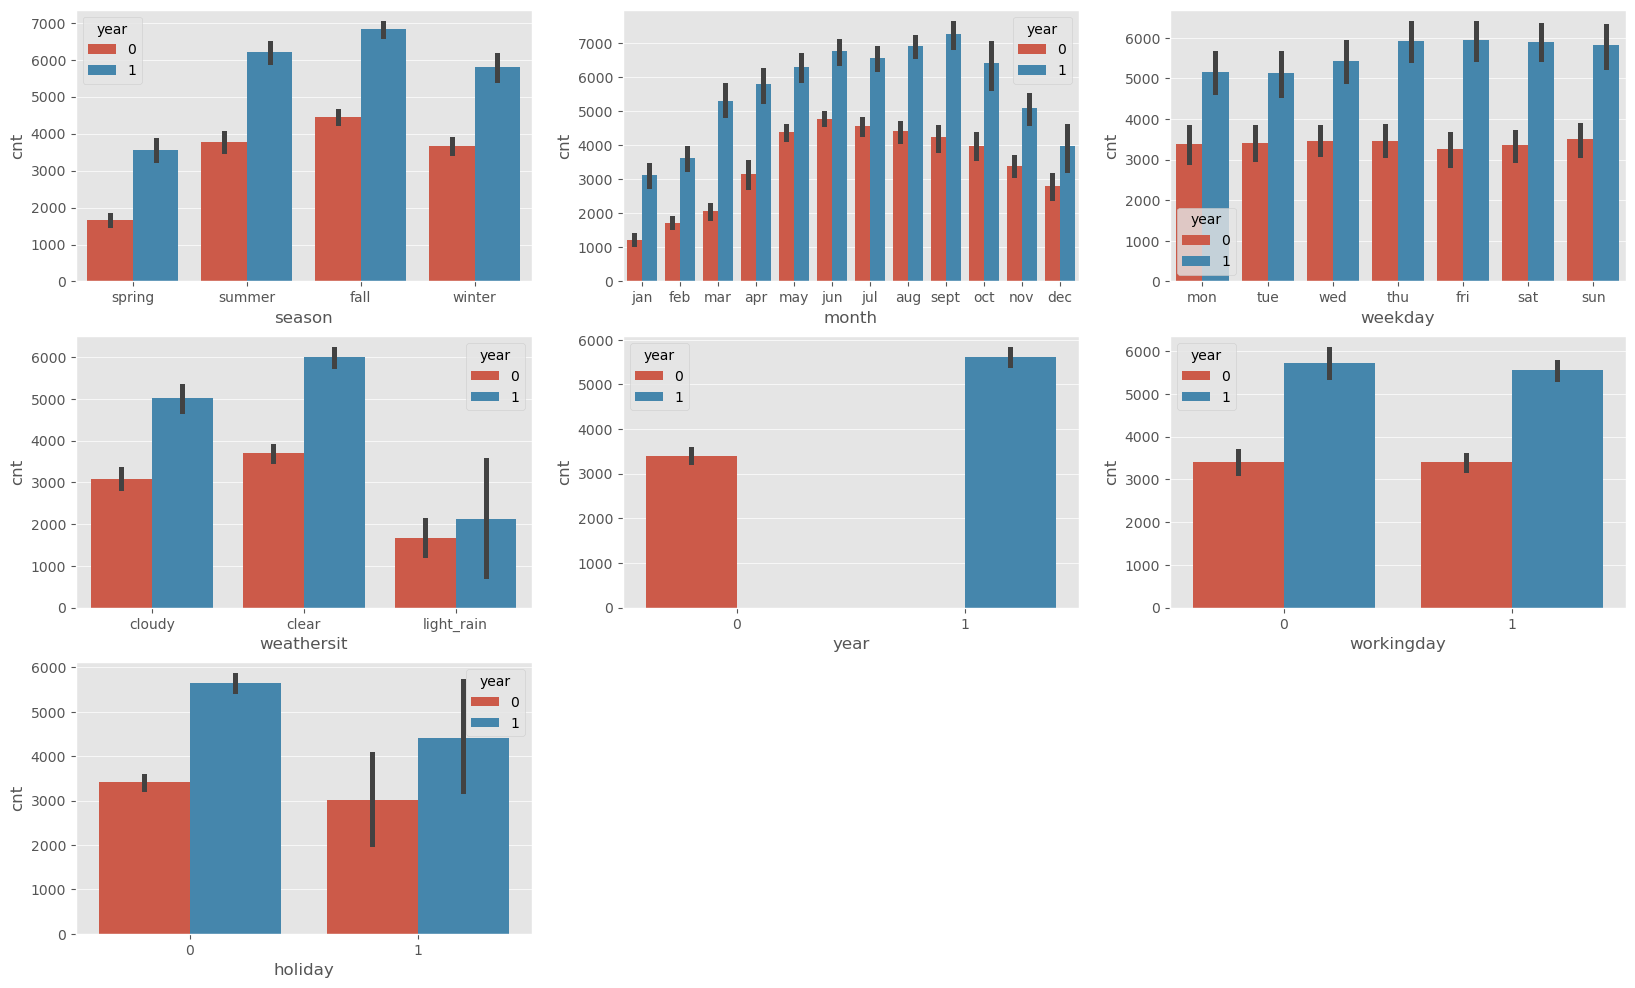

In [178]:
# plotting bar graph for categorical variables with respect to 'year'

    
V1= ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.style.use('ggplot')

plt.figure(figsize=(20, 12))
      

plt.subplot(3,3,1)
sns.barplot(x = 'season',     y = 'cnt',hue= 'year', data = bike)

plt.subplot(3,3,2)
sns.barplot(x = 'month',      y = 'cnt',hue= 'year', data = bike)

plt.subplot(3,3,3)
sns.barplot(x = 'weekday',    y = 'cnt',hue= 'year', data = bike)

plt.subplot(3,3,4)
sns.barplot(x = 'weathersit', y = 'cnt',hue= 'year', data = bike)

plt.subplot(3,3,5)
sns.barplot(x = 'year',       y = 'cnt',hue= 'year', data = bike)

plt.subplot(3,3,6)
sns.barplot(x = 'workingday', y = 'cnt',hue= 'year', data = bike)

plt.subplot(3,3,7)
sns.barplot(x = 'holiday',    y = 'cnt',hue= 'year', data = bike)

plt.show()

### Insights:-

* The demand for rental bike is higher in the year 2019 for each month which sums up the higher demand of bikes for the year 2019 and in other variables as well.

## Data Preparation 

### Dummy variables

* For variables season, weathersit, weekday and month

In [179]:
# dummy variables for categorical values

a= bike[['season','weathersit','weekday','month']]

bike_dummy = pd.get_dummies(data = a, columns =['season','weathersit','weekday','month'], drop_first= True)

In [180]:
# checking the data

bike_dummy.head()

,season_spring,season_summer,season_winter,weathersit_cloudy,weathersit_light_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept
0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [181]:
# adding the results to the original dataset i.e bike

bike = pd.concat([bike, bike_dummy], axis = 1)

In [182]:
# Dropping the variables season, weathersit, weekday and month

bike.drop(columns = ['season','weathersit','weekday','month'], inplace= True)

In [183]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [184]:
bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_cloudy,weathersit_light_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [185]:
# importing library

from sklearn.model_selection import train_test_split


# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)


###  Rescaling the features

In [186]:
# Importing library
# Applying scaler() to variables other than dummy and categorical variables.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


V2 = ['temp', 'atemp', 'humidity', 'windspeed','cnt']

df_train[V2] = scaler.fit_transform(df_train[V2])

In [187]:
# Checking the data after scaling

df_train

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_cloudy,weathersit_light_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0.764151,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0.832835,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0.218017,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
350,0,0,1,0.248216,0.223544,0.577930,0.431816,0.312586,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [188]:
# Checking the Statistical summary

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_cloudy,weathersit_light_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


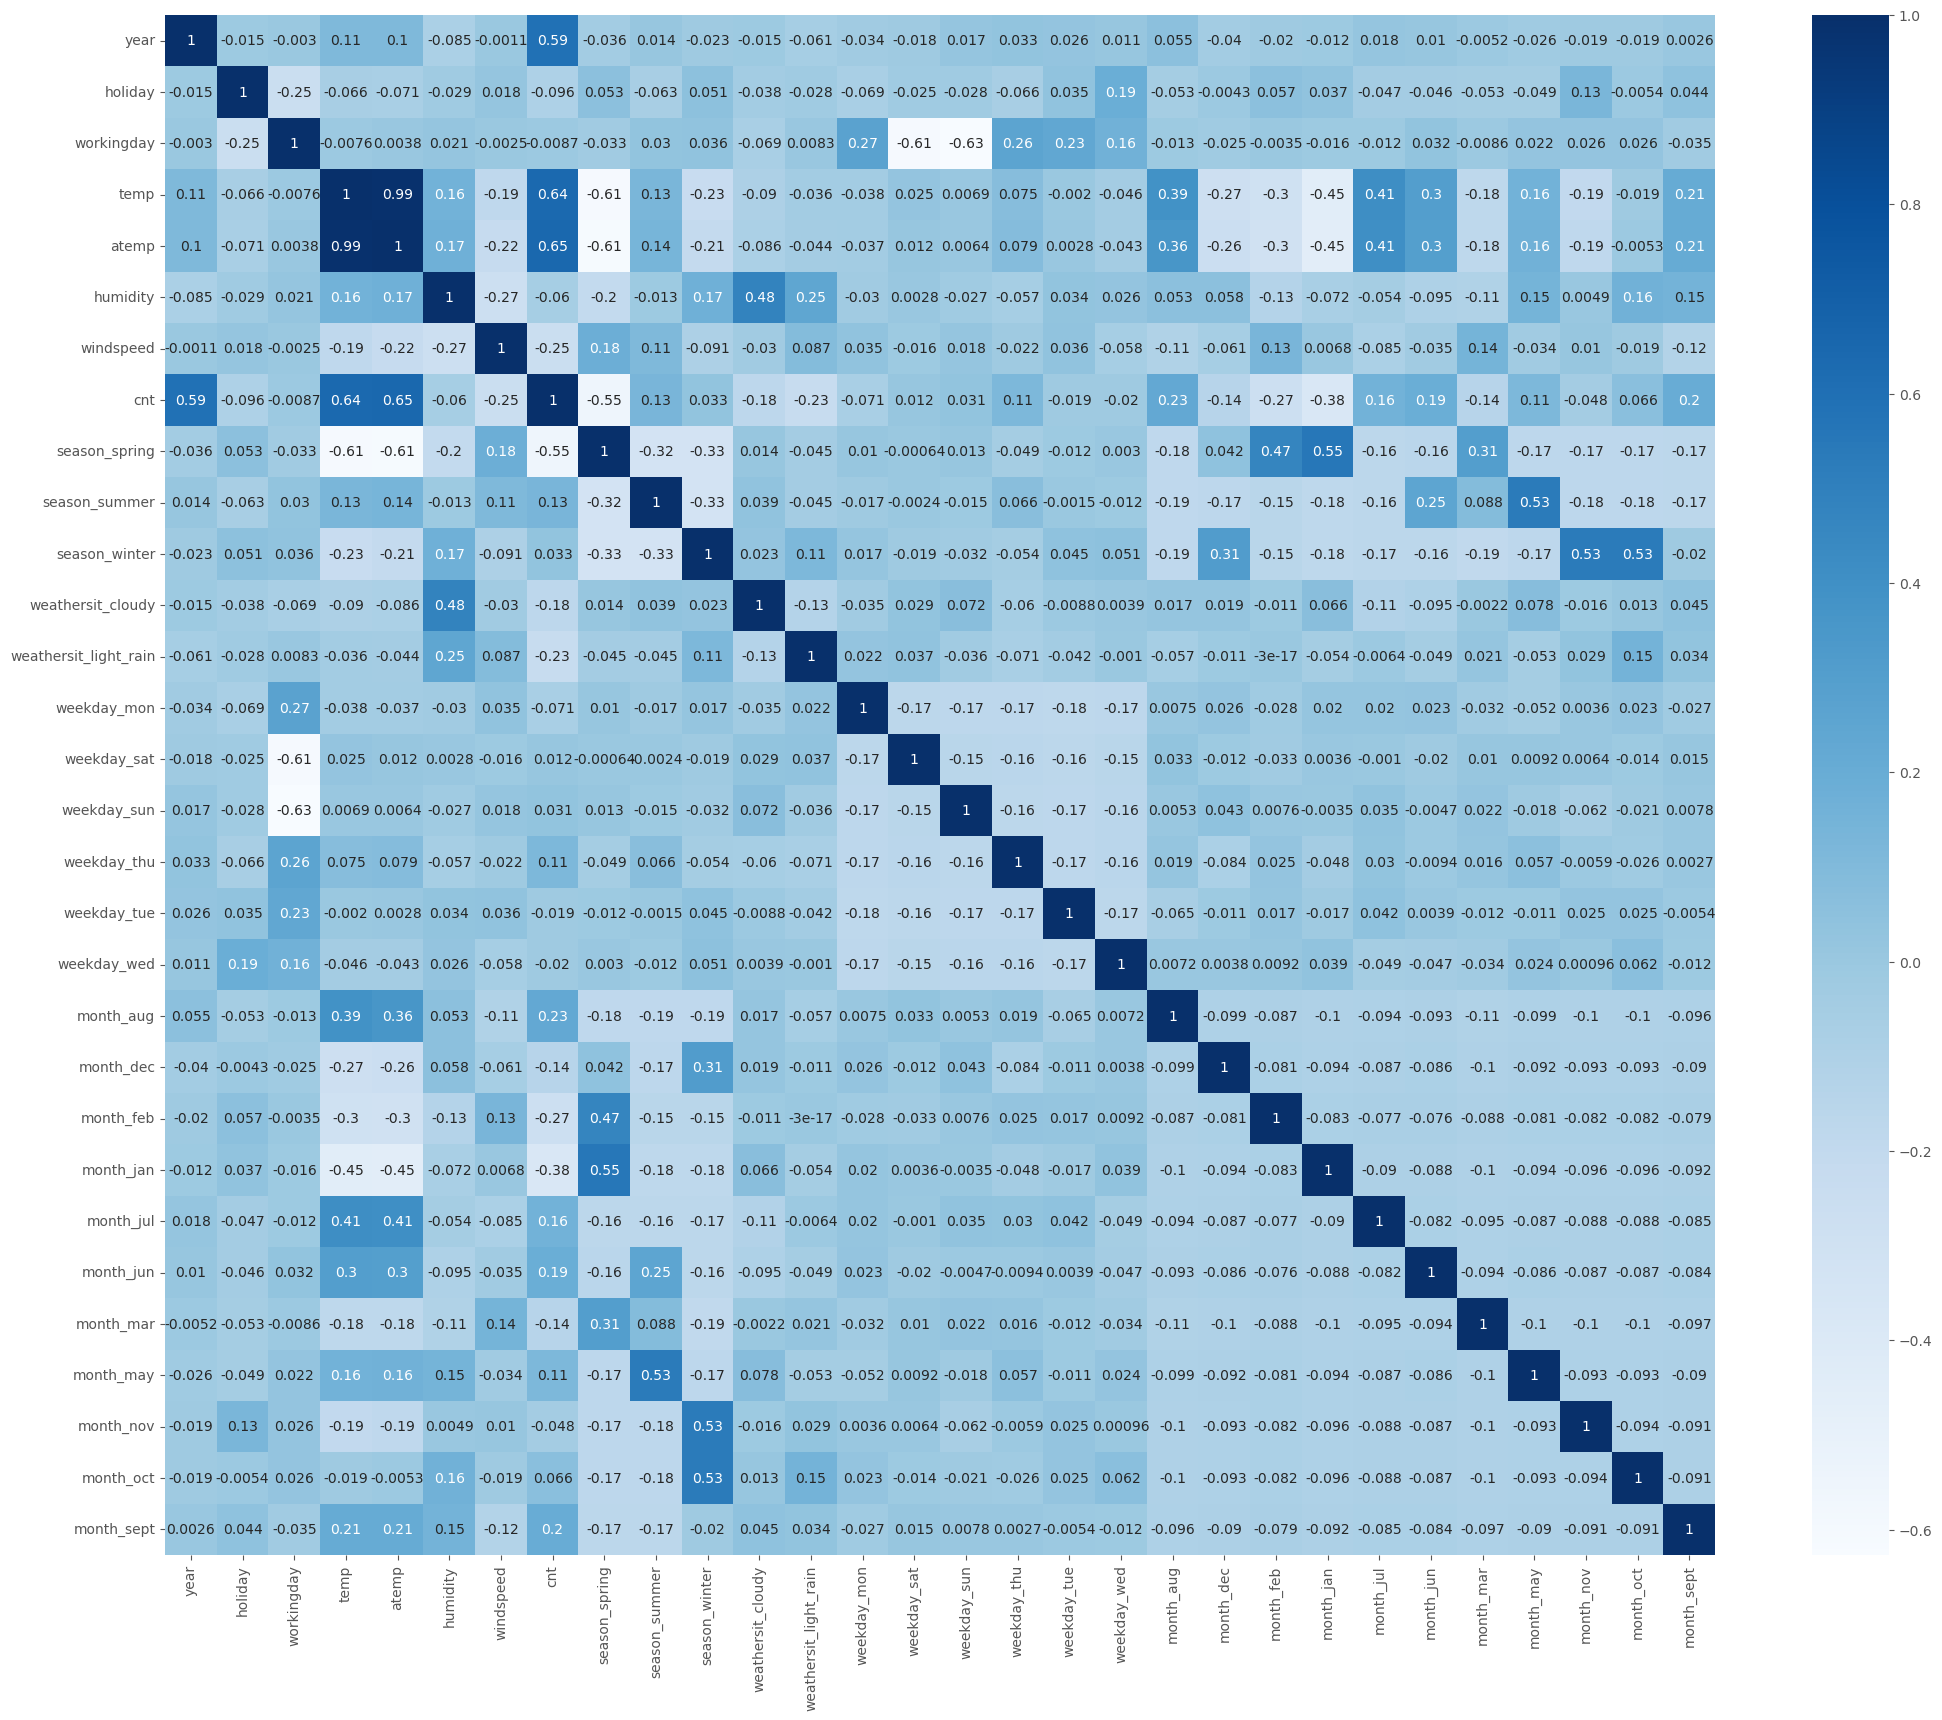

In [189]:
# Checking the correlation coefficients to see which variables are highly correlated


plt.figure(figsize = (25, 20))


sns.heatmap(df_train.corr(), annot = True, cmap="Blues")
plt.show()

### Insights:-

1. Cnt is correlated to atemp and temp with corr coefficient of 0.64 and 0.65 respectively.
2. Similary cnt is correlated to year with correlation coefficient of 0.59.
3. The Winter season shows correlation with November and October month with correlation coefficient of 0.53 & 0.53, the Spring season shows correlation with January and February with correlation coefficient of 0.55 & 0.47, and the Summer season shows correlation with May  with correlation coefficient of 0.53.

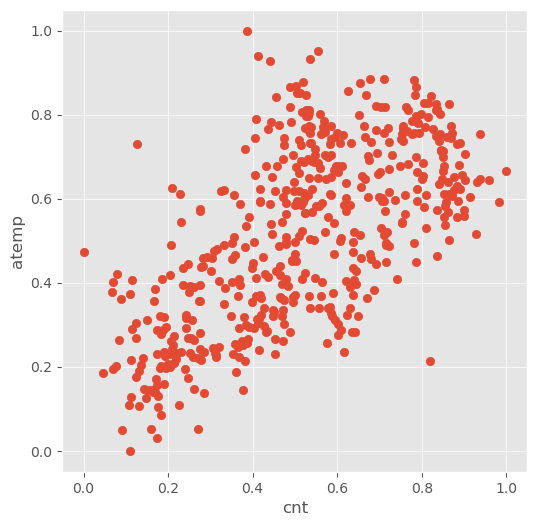

In [190]:
# Confirming the correlation between cnt and atemp

plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.atemp)
plt.xlabel('cnt')
plt.ylabel('atemp')
plt.show()

### Dividing into X and Y sets for the model building

In [191]:
y_train = df_train.pop('cnt')
X_train = df_train

# Building our model

## Selecting Feature Using RFE

In [192]:
# importing libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [193]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_light_rain', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('month_aug', False, 10),
 ('month_dec', True, 1),
 ('month_feb', False, 2),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', False, 14),
 ('month_mar', False, 15),
 ('month_may', False, 7),
 ('month_nov', True, 1),
 ('month_oct', False, 12),
 ('month_sept', True, 1)]

### Making list of variables supported by RFE

In [194]:
c1 = X_train.columns[rfe.support_]
c1

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_cloudy',
       'weathersit_light_rain', 'month_dec', 'month_jan', 'month_jul',
       'month_nov', 'month_sept'],
      dtype='object')

### Variables not supported by RFE

In [195]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'month_aug', 'month_feb',
       'month_jun', 'month_mar', 'month_may', 'month_oct'],
      dtype='object')

In [196]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[c1]

## Model - 1

In [197]:
# Adding a constant variable 

import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)

lm_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          3.34e-189
Time:                        19:56:56   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

### The r2 for model - 1 is 0.845, but p-value for month_dec, month_nov, month_jan is high next, checking multicollinearity with VIF( Variance Inflation factor).

## Calculating VIF for model - 1

In [198]:
# Defining a function for calculating the vif

#importing library

from statsmodels.stats.outliers_influence import variance_inflation_factor


def get_vif(x):
    vif = pd.DataFrame()
    X = x
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by = "VIF", ascending = False))

In [199]:
X_train_rfe.drop('const',axis=1,inplace = True)

get_vif(X_train_rfe)

                 Features    VIF
3                humidity  30.94
2                    temp  17.80
4               windspeed   4.72
5           season_spring   4.37
7           season_winter   4.06
6           season_summer   2.81
8       weathersit_cloudy   2.32
0                    year   2.09
13              month_nov   1.83
11              month_jan   1.75
12              month_jul   1.59
10              month_dec   1.55
14             month_sept   1.41
9   weathersit_light_rain   1.28
1                 holiday   1.06


### The VIF is high for the humidity variable, which can be dropped.

In [200]:
# dropping humidity

X_train_new = X_train_rfe.drop(columns='humidity',axis=1)

## Model - 2

In [201]:
X_train_new = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          1.57e-186
Time:                        19:56:57   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

## Calculating VIF for Model - 2

In [202]:
X_train_new.drop('const',axis=1, inplace=True)

get_vif(X_train_new)

                 Features   VIF
2                    temp  5.17
3               windspeed  4.67
6           season_winter  2.94
4           season_spring  2.89
5           season_summer  2.23
0                    year  2.07
12              month_nov  1.80
10              month_jan  1.66
11              month_jul  1.59
7       weathersit_cloudy  1.56
9               month_dec  1.46
13             month_sept  1.35
8   weathersit_light_rain  1.09
1                 holiday  1.06


### After dropping humidity, the r2 is 0.840 for model - 2 and the p-value for season_summer ,month_nov is high. The VIF for temp is high but after dropping the variable season_summer the VIF will change for other variables.

In [203]:
# Dropping summer

X_train_new.drop('season_summer',axis=1,inplace=True)

## Model - 3

In [204]:
X_train_new = sm.add_constant(X_train_new)

lm_3 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          1.08e-186
Time:                        19:56:57   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

## Calculating VIF for Model - 3

In [205]:
X_train_new.drop('const',axis=1,inplace=True)

get_vif(X_train_new)

                 Features   VIF
2                    temp  4.67
3               windspeed  4.05
5           season_winter  2.54
4           season_spring  2.36
0                    year  2.06
11              month_nov  1.80
9               month_jan  1.65
6       weathersit_cloudy  1.53
8               month_dec  1.46
10              month_jul  1.36
12             month_sept  1.21
7   weathersit_light_rain  1.09
1                 holiday  1.06


### The r2 for Model - 3 is 0.838 and the VIF values for all the varibles is below 5. But some variables have high p-value, which can be dropped.

## Model - 4

In [206]:
# Dropping month_nov

X_train_new.drop('month_nov',axis=1,inplace=True)

In [207]:
X_train_new = sm.add_constant(X_train_new)

lm_4 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          2.02e-186
Time:                        19:56:57   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

## Calculating VIF for Model - 4

In [208]:
X_train_new.drop('const',axis=1,inplace=True)

get_vif(X_train_new)

                 Features   VIF
2                    temp  4.63
3               windspeed  4.00
4           season_spring  2.36
0                    year  2.06
5           season_winter  1.64
9               month_jan  1.64
6       weathersit_cloudy  1.53
10              month_jul  1.36
8               month_dec  1.29
11             month_sept  1.20
7   weathersit_light_rain  1.08
1                 holiday  1.04


### The r2 for Model - 4 is 0.836 and VIF for variables is slightly reduced. The variable month_dec has p-value of 0.37 and is insignificant and can be dropped.

## Model - 5 

In [209]:
# Dropping month_dec

X_train_new.drop('month_dec',axis=1,inplace=True)

In [210]:
X_train_new = sm.add_constant(X_train_new)

lm_5 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          1.13e-186
Time:                        19:56:57   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

## Calculating VIF for Model - 5

In [211]:
X_train_new.drop('const',axis=1,inplace=True)

get_vif(X_train_new)

                 Features   VIF
2                    temp  4.63
3               windspeed  4.00
4           season_spring  2.25
0                    year  2.06
8               month_jan  1.60
6       weathersit_cloudy  1.53
5           season_winter  1.40
9               month_jul  1.36
10             month_sept  1.20
7   weathersit_light_rain  1.08
1                 holiday  1.04


### The r2 for Model - 5 is 0.835 , the VIF of variables is also same as the previous model, except for few variable. The variable month_jan has p-value of 0.18 and for the simplicity of the model it can be dropped.

## Model - 6 (Final Model)

In [212]:
# Dropping month_jan

X_train_new.drop('month_jan',axis=1,inplace=True)

In [213]:
X_train_new= sm.add_constant(X_train_new)

lm_6 = sm.OLS(y_train, X_train_new).fit()

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          1.16e-186
Time:                        19:56:57   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

## Calculating VIF for Model - 6

In [214]:
a= ['year','holiday','temp','windspeed','season_spring', 'season_winter', 'weathersit_cloudy', 'weathersit_light_rain',
 'month_jul', 'month_sept']


get_vif(X_train_new[a])

                Features   VIF
2                   temp  4.60
3              windspeed  4.00
0                   year  2.06
4          season_spring  1.65
6      weathersit_cloudy  1.51
5          season_winter  1.40
8              month_jul  1.35
9             month_sept  1.20
7  weathersit_light_rain  1.08
1                holiday  1.04


### The VIFs and p-values both are within the acceptable range. So we go ahead and make our predictions using this model only.

## Predicting Values 

In [215]:
y_train_cnt = lm_6.predict(X_train_new)

## Residual analysis 

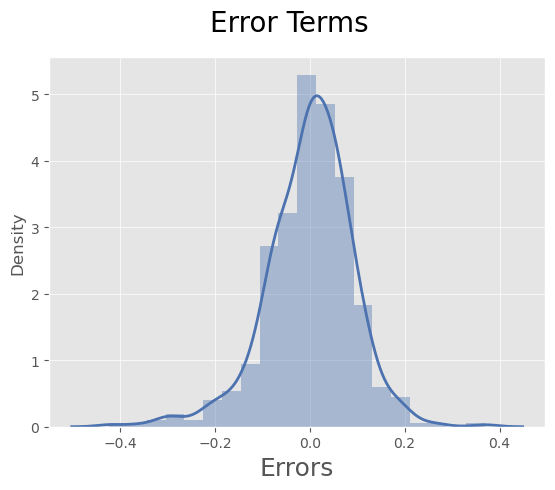

In [216]:
# Distribution plot of the error terms

plt.style.use('seaborn-deep')

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)        
plt.show()

### Error terms are normally distributed.

## Multicolinearity

In [217]:
a= ['year','holiday','temp','windspeed','season_spring', 'season_winter', 'weathersit_cloudy', 'weathersit_light_rain',
 'month_jul', 'month_sept']


get_vif(X_train_new[a])

                Features   VIF
2                   temp  4.60
3              windspeed  4.00
0                   year  2.06
4          season_spring  1.65
6      weathersit_cloudy  1.51
5          season_winter  1.40
8              month_jul  1.35
9             month_sept  1.20
7  weathersit_light_rain  1.08
1                holiday  1.04


### The VIF for variables is under the acceptable range.

## Linearity of the Model

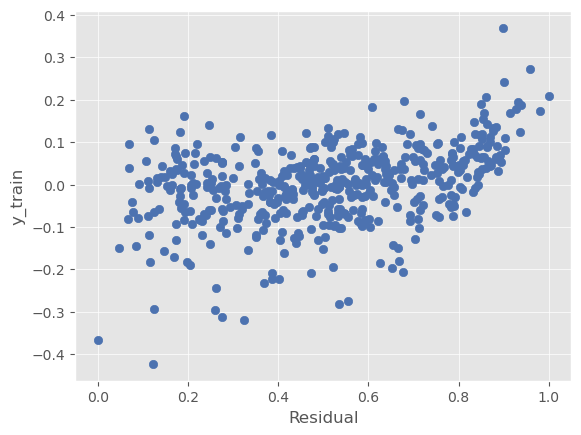

In [218]:
residual = (y_train - y_train_cnt)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## Error terms have constant variance (Homoscedasticity)

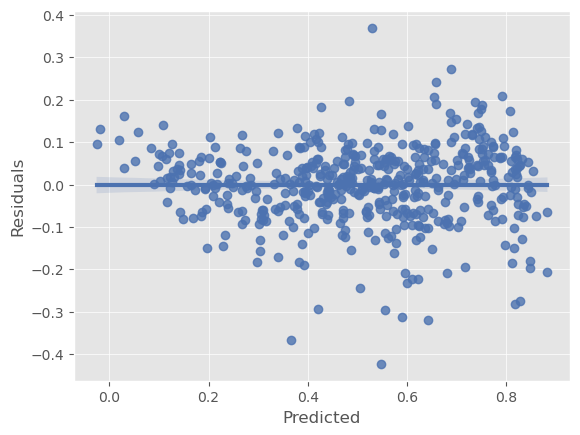

In [219]:
sns.regplot(y_train_cnt,y_train - y_train_cnt)
plt.ylabel("Residuals")
plt.xlabel("Predicted")
plt.show()

## No autocorrelation of errors 

In [220]:
from statsmodels.stats.stattools import durbin_watson
  

# Using statsmodels.durbin_watson() method
g = durbin_watson(y_train-y_train_cnt)
  
print(round(g,2))

2.0


### No auto-correlation present. Value of Durbin Watson test present within acceptable range.

# Making predictions

### Applying the scaling on the test set

In [221]:
V2 = ['temp', 'atemp', 'humidity', 'windspeed','cnt']

df_test[V2] = scaler.transform(df_test[V2])

In [222]:
# dividing into X_test and Y_test

X_test = df_test
y_test = df_test.pop('cnt')

In [223]:
# Checking the test set

X_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,weathersit_cloudy,weathersit_light_rain,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sept
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [224]:
# Retrieving variable names from trainig set

X_train_new.columns

Index(['const', 'year', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_cloudy', 'weathersit_light_rain',
       'month_jul', 'month_sept'],
      dtype='object')

In [225]:
X_test = X_test[['year', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_cloudy', 'weathersit_light_rain',
       'month_jul', 'month_sept']]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [226]:
# prediction

# Making predictions
y_pred = lm_6.predict(X_test)

## Model Evaluation


### Calculating r2

In [227]:
from sklearn.metrics import r2_score

round(r2_score(y_test, y_pred),3)


0.807

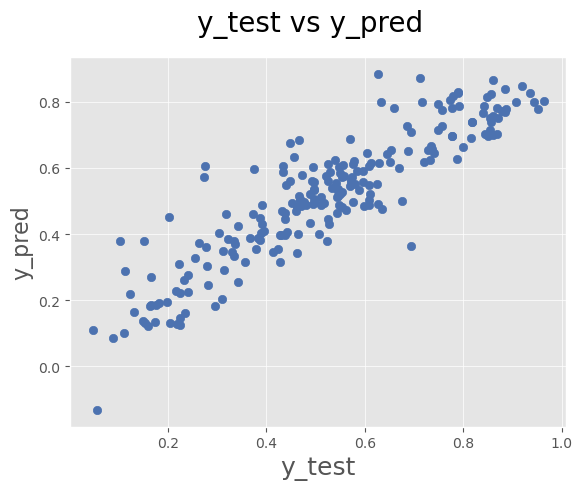

In [228]:
# Plotting y_test and y_pred to understand the spread.


fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

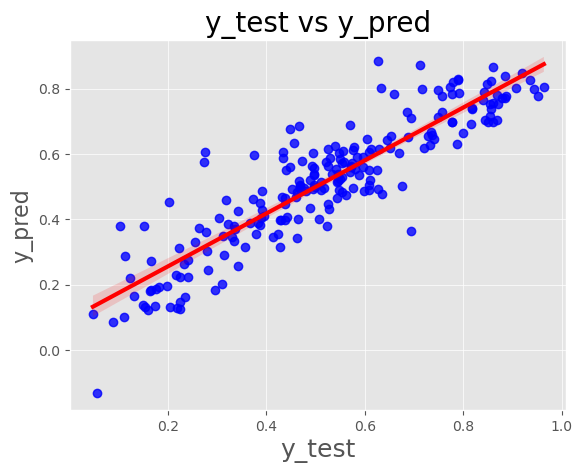

In [229]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


In [230]:
round(lm_6.params,3)

const                    0.252
year                     0.234
holiday                 -0.099
temp                     0.451
windspeed               -0.140
season_spring           -0.111
season_winter            0.047
weathersit_cloudy       -0.081
weathersit_light_rain   -0.286
month_jul               -0.073
month_sept               0.058
dtype: float64

## Equation of our best fitted line is:

$cnt = 0.252 +  0.234 \times year -0.099  \times  holiday + 0.451 \times temp -0.140 \times windspeed -0.111 \times season.spring + 0.047 \times season.winter - 0.081 \times weathersit.cloudy - 0.286 \times weathersit.light.rain - 0.073 \times month.jul + 0.058 \times month.sept $

### Conclusion :-

* The rental bike demand depends upon year, holiday, temp , Season( Spring , winter), windspeed, weathersit(light_rain , cloudy) and months(July and September).

the top 3 predictor variables that influences the bike booking are:

1. temp with coefficient of 0.451
2. month_sept with coefficient of 0.058
3. season_winter with coefficient of 0.047

With increase in temp the demand for rental bikes increases and during the september month the demand is high.
